In [ ]:
import os
from pathlib import Path
import glob
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Fish/

'Black Sea Sprat'  'Red Mullet'      Shrimp		   Trout
'Gilt-Head Bream'  'Red Sea Bream'  'Striped Red Mullet'   validation
'Hourse Mackerel'  'Sea Bass'	     train


In [ ]:

!rm -rf /content/drive/MyDrive/Fish/train
!rm -rf /content/drive/MyDrive/Fish/validation

## Root Folders

In [ ]:
folders = "/content/drive/MyDrive/Fish/"
folder_list= os.listdir("/content/drive/MyDrive/Fish")

In [ ]:
folder_list

['Sea Bass',
 'Shrimp',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Sea Bream',
 'Striped Red Mullet',
 'Red Mullet',
 'Black Sea Sprat',
 'Trout']

### Count of pictures

In [ ]:
for folder in folder_list:
    print(len(glob.glob1(folders+folder,"*.png")))

1000
1000
1000
1000
1000
1000
1000
1000
1000


### Train Validation partitions

In [ ]:
TRAIN_DIR = f"{folders}train"
VAL_DIR = f"{folders}validation"

In [ ]:
train_dir = os.path.join(folders, "train")
os.makedirs(train_dir, exist_ok=True)
val_dir = os.path.join(folders, "validation")
os.makedirs(val_dir, exist_ok=True)

In [ ]:
for folder in folder_list:
    folder = os.path.join(TRAIN_DIR, folder)
    os.makedirs(folder, exist_ok=True)

for folder in folder_list:
    folder = os.path.join(VAL_DIR, folder)
    os.makedirs(folder, exist_ok=True)


In [ ]:
for folder in folder_list:
    pngs = [f for f in os.listdir(folders+folder) if '.png' in f.lower()]
    i = 1
    dest_path= TRAIN_DIR
    for png in pngs:
        source = f"{folders}{folder}/{png}"
        #print(source)
        dest = f"{dest_path}/{folder}/{png}"
        #print(dest)
        if i == 700:
            dest_path = VAL_DIR
        shutil.copy(source, dest)
        i+=1

### Size of train pictures

In [ ]:
for folder in folder_list:
    print(len(os.listdir(f"{train_dir}/{folder}")))

700
700
700
700
700
700
700
700
700


### Size of validation pictures

In [ ]:
for folder in folder_list:
    print(len(os.listdir(f"{VAL_DIR}/{folder}")))

300
300
300
300
300
300
300
300
300


In [ ]:
import matplotlib.pyplot as plt
import PIL


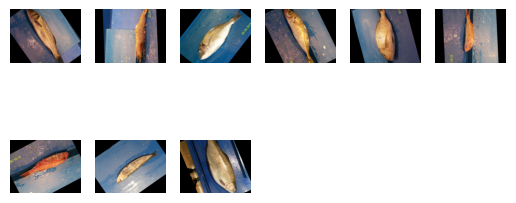

In [ ]:

files=[] #empty list
rows = 3
for folder in folder_list:
    img = os.path.join(f"{train_dir}/{folder}/00001.png")
    files.append(img)

for num, x in enumerate(files):
    img = PIL.Image.open(x)
    plt.subplot(rows,6,num+1)
    plt.axis('off')
    plt.imshow(img)

## Traning Without Data augmentation

### Model

#### Learning Rate

In [ ]:
import tensorflow as tf


In [ ]:
def make_model(lr):
  model = tf.keras.models.Sequential([
      #First Conv layer
      tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(250,250,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      # Second Conv layer
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      # Third Conv layer
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      #Forth Conv layer
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation="relu"),
      tf.keras.layers.Dense(9, activation="softmax")
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])




  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

training_datagen = ImageDataGenerator(
      rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAIN_DIR,
	target_size=(250,250),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VAL_DIR,
	target_size=(250,250),
	class_mode='categorical',
  batch_size=126
)

Found 6300 images belonging to 9 classes.
Found 2700 images belonging to 9 classes.


In [ ]:
from tensorflow.keras import backend as c


In [ ]:
scores = {}
for lr in [0.0001, 0.001, 0.0005, 0.005]:
  print(lr)
  c.clear_session()
  del model
  model = make_model(lr=lr)
  history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=5)
  scores[lr] = history.history
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs = range(len(acc))
  plt.plot(epochs, acc, "r", label="traning accuracy")
  plt.plot(epochs, val_acc, "b", label="validation accuracy")
  plt.title(f"{lr} training and validation accuracy")
  plt.legend(loc=0)
  plt.show()

  plt.plot(epochs, loss, "r", label="traning loss")
  plt.plot(epochs, val_loss, "b", label="validation loss")
  plt.title(f"{lr} training and validation accuracy")
  plt.legend(loc=0)
  plt.show()
  print()




0.0001


AttributeError: ignored

In [ ]:
import numpy as np

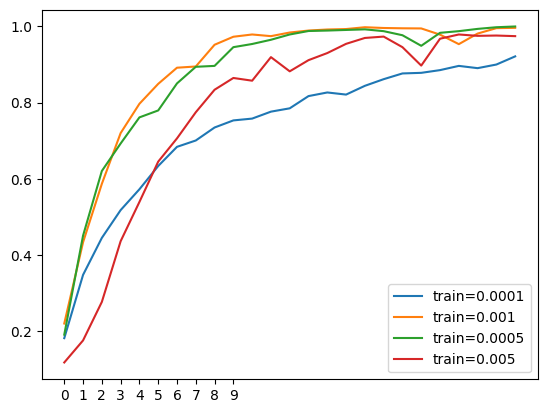

In [ ]:
for lr, hist in scores.items():
          plt.plot(hist['accuracy'], label=('train=%s' % lr))
          plt.xticks(np.arange(10))
          plt.legend()

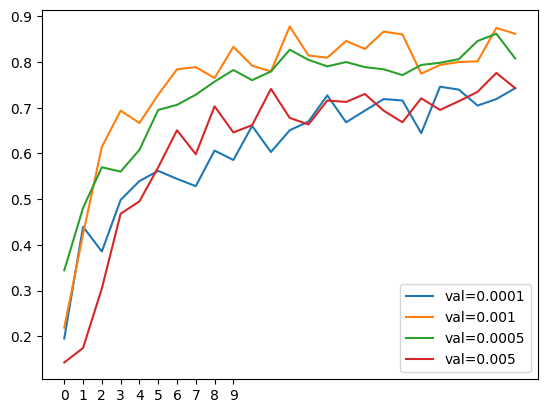

In [ ]:
for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
  plt.xticks(np.arange(10))
  plt.legend()

#### Inner Size

In [ ]:
LEARNING_RATE = 0.001

In [ ]:
def make_model(lr = LEARNING_RATE, size_inner=512):
  tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(250, 250, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(size_inner, activation="relu"),
      tf.keras.layers.Dense(9, activation="softmax")
])
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model




128
Epoch 1/25
20/20 [==============================] - 39s 2s/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 2.5360 - val_accuracy: 0.7407
Epoch 2/25
20/20 [==============================] - 35s 2s/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 2.3204 - val_accuracy: 0.7566
Epoch 3/25
20/20 [==============================] - 35s 2s/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 2.4930 - val_accuracy: 0.7566
Epoch 4/25
20/20 [==============================] - 34s 2s/step - loss: 0.0022 - accuracy: 0.9988 - val_loss: 2.2848 - val_accuracy: 0.7619
Epoch 5/25
20/20 [==============================] - 34s 2s/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 2.3880 - val_accuracy: 0.7566
Epoch 6/25
20/20 [==============================] - 34s 2s/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 2.2011 - val_accuracy: 0.7751
Epoch 7/25
20/20 [==============================] - 34s 2s/step - loss: 0.0053 - accuracy: 0.9972 - val_loss: 2.3053 - val_accuracy: 0.7593
Epoch 8/25
20/20

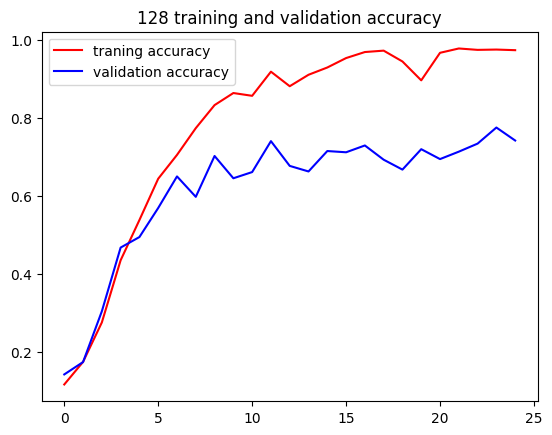

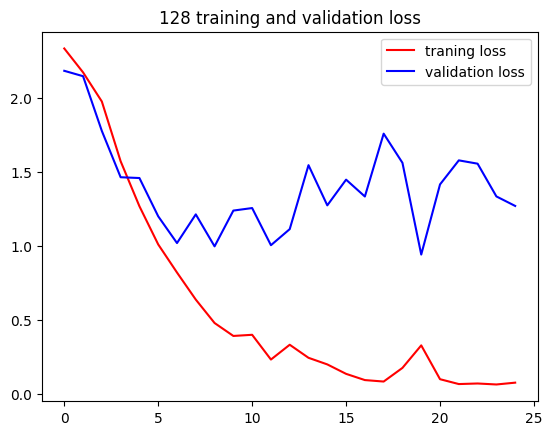



256
Epoch 1/25
20/20 [==============================] - 39s 2s/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 3.5182 - val_accuracy: 0.7011
Epoch 2/25
20/20 [==============================] - 39s 2s/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 2.5980 - val_accuracy: 0.7619
Epoch 3/25
20/20 [==============================] - 35s 2s/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 2.2745 - val_accuracy: 0.7672
Epoch 4/25
20/20 [==============================] - 34s 2s/step - loss: 4.2773e-04 - accuracy: 1.0000 - val_loss: 2.2054 - val_accuracy: 0.7725
Epoch 5/25
20/20 [==============================] - 34s 2s/step - loss: 3.2138e-04 - accuracy: 1.0000 - val_loss: 2.4553 - val_accuracy: 0.7593
Epoch 6/25
20/20 [==============================] - 36s 2s/step - loss: 4.8789e-04 - accuracy: 1.0000 - val_loss: 2.5229 - val_accuracy: 0.7804
Epoch 7/25
20/20 [==============================] - 35s 2s/step - loss: 1.1969e-04 - accuracy: 1.0000 - val_loss: 2.7961 - val_accuracy: 0.761

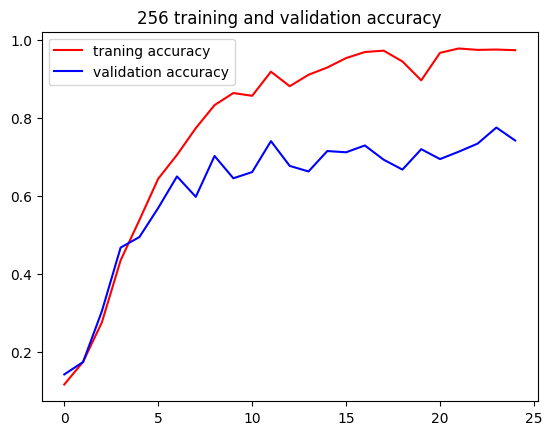

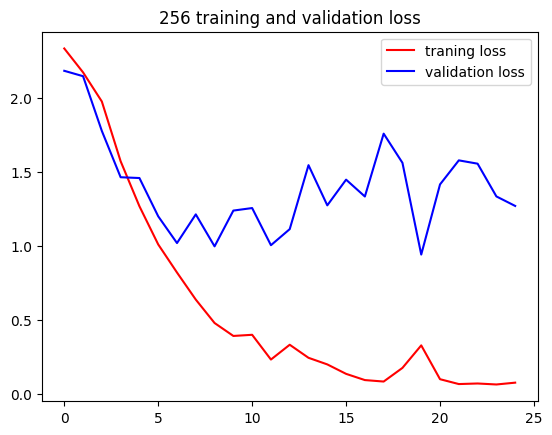



512
Epoch 1/25
20/20 [==============================] - 37s 2s/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 3.9358 - val_accuracy: 0.7011
Epoch 2/25
20/20 [==============================] - 39s 2s/step - loss: 0.0048 - accuracy: 0.9976 - val_loss: 3.4901 - val_accuracy: 0.7275
Epoch 3/25
20/20 [==============================] - 36s 2s/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 2.8959 - val_accuracy: 0.7407
Epoch 4/25
20/20 [==============================] - 35s 2s/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 3.1625 - val_accuracy: 0.7540
Epoch 5/25
20/20 [==============================] - 34s 2s/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 3.0987 - val_accuracy: 0.7407
Epoch 6/25
20/20 [==============================] - 37s 2s/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 2.8660 - val_accuracy: 0.7751
Epoch 7/25
20/20 [==============================] - 34s 2s/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 2.3751 - val_accuracy: 0.7698
Epoch 8/25
 4/

KeyboardInterrupt: ignored

In [ ]:
scores = {}
for size in [128, 256, 512, 768]:
  print(size)
  c.clear_session()
  del model
  model = make_model(lr=LEARNING_RATE, size_inner=size)
  history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)
  scores[size] = history.history
  epochs = range(len(acc))
  plt.figure(figsize=(15,10))
  plt.subplot(2, 2, 1)
  plt.plot(epochs, acc, "r", label="traning accuracy")
  plt.plot(epochs, val_acc, "b", label="validation accuracy")
  plt.title(f"{size} training and validation accuracy")
  plt.legend(loc=0)
  plt.subplot(2, 2, 2)
  plt.plot(epochs, loss, "r", label="traning loss")
  plt.plot(epochs, val_loss, "b", label="validation loss")
  plt.title(f"{size} training and validation loss")
  plt.legend(loc=0)
  plt.show()
  print()
  print()

In [ ]:
for size, hist in scores.items():
#plt.plot(hist['accuracy'], label=('train=%s' % lr))
  plt.plot(hist['val_accuracy'], label=('val=%s' % size))
  plt.xticks(np.arange(10))
  plt.legend()

In [ ]:
for size, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('val=%s' % size))
  plt.xticks(np.arange(10))
  plt.legend()

#### Droprate

In [ ]:
LEARNING_RATE= 0.1
size_inner = 512

In [ ]:
def make_model(lr = LEARNING_RATE, size_inner=512, drop_rate=0.1):
  tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(250, 250, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), aktivasyon="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), aktivasyon="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), aktivasyon="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(drop_rate),
  tf.keras.layers.Dense(size_inner, activation="relu"),
  tf.keras.layers.Dense(9, activation="softmax")
  ])
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
scores = {}
for drop in [0.1, 0.2, 0.3, 0.5]:
  print(drop)
  c.clear_session()
  del model
  model = make_model(lr=LEARNING_RATE, inner_size=size, drop_rate=drop)
  history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)
  scores[drop] = history.history
  epochs = range(len(acc))
  plt.figure(figsize=(15,10))
  plt.plot(epochs, acc, "r", label="traning accuracy")
  plt.plot(epochs, val_acc, "b", label="validation accuracy")
  plt.title(f"{size} training and validation accuracy")
  plt.legend(loc=0)
  plt.subplot(2, 2, 2)
  plt.plot(epochs, loss, "r", label="traning loss")
  plt.plot(epochs, val_loss, "b", label="validation loss")
  plt.title(f"{size} training and validation loss")
  plt.legend(loc=0)
  plt.show()
  print()
  print()

In [ ]:
for drop, hist in scores.items():
  #plt.plot(hist['accuracy'], label=('train=%s' % lr))
  plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
  plt.xticks(np.arange(10))
  plt.legend()

In [ ]:
for drop, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
  plt.xticks(np.arange(10))
  plt.legend()

### Training with Data augmentation

In [ ]:
def make_model(lr = LEARNING_RATE, size_inner=512, drop_rate=0.1):
  tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(250, 250, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), aktivasyon="relu"),
  tf.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), aktivasyon="relu"),
  tf.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), aktivasyon="relu"),
  tf.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(size_inner, activation="relu"),
  tf.layers.BatchNormalization(),
  tf.keras.layers.Dropout(drop_rate),
  tf.keras.layers.Dense(9, activation="softmax")
  ])
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
training_datagen = ImageDataGenerator(
rescale = 1./255)

validation_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')


train_generator = training_datagen.flow_from_directory(
TRAIN_DIR,
target_size=(250,250),
class_mode='categorical',
batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
VAL_DIR,
target_size=(250,250),
class_mode='categorical',
batch_size=126
)

In [ ]:
LEARNING_RATE = 0.001
SIZE=256,
DROP=0.2

In [ ]:

c.clear_session()
del model
model = make_model(lr=LEARNING_RATE, inner_size=SIZE, drop_rate=DROP)
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)
scores[drop] = history.history
epochs = range(len(acc))
plt.figure(figsize=(15,10))
plt.plot(epochs, acc, "r", label="traning accuracy")
plt.plot(epochs, val_acc, "b", label="validation accuracy")
plt.title(f"{size} training and validation accuracy")
plt.legend(loc=0)
plt.subplot(2, 2, 2)
plt.plot(epochs, loss, "r", label="traning loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title(f"{size} training and validation loss")
plt.legend(loc=0)
plt.show()


NameError: ignored